# CSE 840 Mini-Project: Twitter Sentiment Analysis

### Due date: Sunday, April 30, 2023 (before midnight) 

The objective of this project is to train a classifier for predicting the sentiment of a tweet. You are only allowed to use the standard python library (including python regular expression library) along with the matplotlib, pandas, and numpy libraries to implement the code. No other library functions are allowed (except for tqdm to monitor progress of your program execution). You must use the Jupyter notebook template provided here to write your program. Rename the notebook as **project_yourlastname.ipynb** and submit it to D2L. 

In [1]:
##########################################################
# List of libraries permitted to be used for the project
##########################################################

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from tqdm import tqdm

##########################################################################################
# The following two functions can be used to split the data and evaluate your classifier.
# No other functions in scikit-learn library are permitted.
##########################################################################################

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

numTweets = 50000        # Number of tweets to be preprocessed (can be reduced if it slows down your machine)

**Step 0:** Download the `twitter.csv` file from D2L and load it into the Jupyter notebook. Note that the original data file contains 1 million tweets, each has been classified as having positive or negative sentiment. If you're running the code on a smaller machine, you can limit your analysis to 50,000 or 100,000 tweets by setting the appropriate numTweets parameter below. However, the smaller the number of tweets, the more likely your classifier may overfit the training data and achieves slightly lower accuracy.

In [2]:
data = pd.read_csv('/Users/yashashvini/Desktop/MSU/CSE840/project/twitter.csv',nrows=numTweets)
data[:20]

,text,sentiment
0,post birthday and feeling great,positive
1,Has 2 go 2 sunday school w/o 2 of my favorite ...,negative
2,What is this incessantly bright skin-burning s...,negative
3,"@downesy That link didn't work, squire What...",negative
4,@musicaddicted13 sowie about your mouth cai,negative
5,I'm the operator with my pocket calculator ......,positive
6,"@fishhhface Yeah, keyword is 'cute'. In the ot...",positive
7,Goooooooodnaaaaayt sa lahat http://plurk.com/...,positive
8,Doing coursework .. Its sunny and I want to b...,negative
9,Wish there was still the playoffs on tv ARGH!...,negative


## B. DATA EXPLORATION AND PREPROCESSING

In this step, you need to write the code to preprocess the twitter data and perform some exploratory analysis.

**Step 1:** Write a function named `preprocess` that takes an input string and preprocesses it in the following way. Make sure you follow the order of the preprocessing steps listed below to avoid making any mistakes:

1. Convert all the characters in the tweet message into lower case.

2. Convert all occurrences of the following markup strings in the tweet message: 
`\&quot;` `\&amp;` `\&gt;` and `\&lt` into white space characters.

3. Replace every occurrence of the following special characters in the tweet message: 
<pre>tab comma semicolon doublequote("") ! ? + = * | (  )  [  ] {  }</pre>
with a white space character. However, **do not remove** the following special characters:
<pre>period(.)  colon(:)  percent(%)  singlequote(')  dash(-)  slashes(\ or /)  underscore(_)  alias(@)  hashtag(#)</pre>
from the tweet message.

4. Remove all the periods except for those located between 2 non-period characters. You should also replace any occurrence of 2 or more consecutive period characters with a white space character. For example:
<pre>Before preprocessing: Hey...there! My GPA is only 3.5..according to http://student.msu.edu.</pre>
<pre> After preprocessing: hey there my gpa is only 3.5 according to http://student.msu.edu</pre>

5. Remove all the extra white space characters so that every word token is separated by a single white space character. For example:
<pre>Before preprocessing: Good        morning</pre>
<pre> After preprocessing: good morning</pre>

For this step, you should use the python regular expression library (re) to preprocess the text. For more information and examples of how to use the library, you may refer to the documentation and examples given here
- https://docs.python.org/3/library/re.html
- https://pynative.com/python-regex-replace-re-sub/

The function should return a string object that represents the preprocessed input text. You are prohibited from using any other text processing libraries (such as nltk and scikit-learn) to do this. 

In [3]:
def preprocess(sentence):
    """"
        Function to preprocess an input string (e.g., a tweet message)
            Input: a string
            Output: a string
            
        Make sure you follow the order of the preprocessing steps stated above to avoid generating 
        incorrect answer.
    """

    sentence = sentence.lower()
    sentence = re.sub(r"&quot;|&amp;|&gt;|&lt;", " ", sentence)
    sentence = re.sub(r'[&<>"\"]', ' ', sentence)
    sentence = re.sub(r'\.{2,}', ' ', sentence)
    sentence = re.sub(r'([a-zA-Z])\.(\s|$)', r'\1\2', sentence)
    sentence = re.sub(r"\.(?=[^A-Za-z0-9])", "", sentence)
    sentence = re.sub(r'\t|,|;|"|!|\?|\+|=|\*|\||\(|\)|\[|\]|\{|\}', " ", sentence)
    sentence = re.sub(r"\s+", " ", sentence)
    sentence = sentence.strip()

    return sentence 
    

Code for testing correctness of the preprocessing function

In [4]:
str = "Hey...there. My GPA is only 3.5..according to http://student.msu.edu."
print('Before:', str)
print(' After:',preprocess(str))

Before: Hey...there. My GPA is only 3.5..according to http://student.msu.edu.
 After: hey there my gpa is only 3.5 according to http://student.msu.edu


Code to show the result of preprocessing on a subset of the tweets

In [5]:
for i in iter([9,15,45,73,81,89,111,113,132,135,138,144,189,190]):
    print('Before:', data['text'][i])
    print('After: ', preprocess(data['text'][i]), '\n')

Before: Wish there was still the playoffs on tv  ARGH!!! Nothing good is going on these dayz...other than &quot;I'm a celebrity, get me outta here&quot; :/
After:  wish there was still the playoffs on tv argh nothing good is going on these dayz other than i'm a celebrity get me outta here :/ 

Before: You yes you lookin at your phone. BOO! scared ya.  call me!  &lt;Superman&gt;
After:  you yes you lookin at your phone boo scared ya call me superman 

Before: Done with KEN-YA DANCE. It was chaotic but fun. All pics will be up on MySpace &amp; Facebook -- that is if you're on my friends list. 
After:  done with ken-ya dance it was chaotic but fun all pics will be up on myspace facebook -- that is if you're on my friends list 

Before: @faceman101 *cough* on O'Connell street in the little kiosk *cough* 
After:  @faceman101 cough on o'connell street in the little kiosk cough 

Before: I'm outta here 4 bit. Too pooped 2 think...not that I do it very well anyway...(just kidding).  Have a gre

**Step 2:** Apply the preprocessing function to the twitter data column of the input dataframe object.

In [6]:
data['text'] = data['text'].apply(preprocess)
data[:20]

,text,sentiment
0,post birthday and feeling great,positive
1,has 2 go 2 sunday school w/o 2 of my favorite ...,negative
2,what is this incessantly bright skin-burning s...,negative
3,@downesy that link didn't work squire what wer...,negative
4,@musicaddicted13 sowie about your mouth cai,negative
5,i'm the operator with my pocket calculator ham...,positive
6,@fishhhface yeah keyword is 'cute' in the othe...,positive
7,goooooooodnaaaaayt sa lahat http://plurk.com/p...,positive
8,doing coursework its sunny and i want to be ou...,negative
9,wish there was still the playoffs on tv argh n...,negative


**Step 3:** Draw a bar chart to display the class distribution, i.e., proportion of tweets with positive and negative sentiment.

<AxesSubplot:>

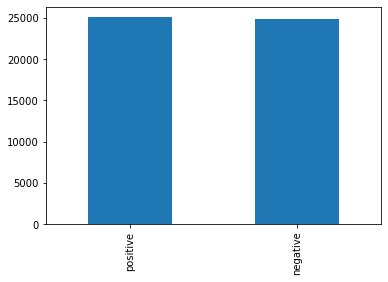

In [7]:
data.sentiment.value_counts()[:20].plot(kind='bar')

**Step 4:** In this step, you will test the following hypotheses:
- Does a tweet that contains at least one hashtag will more likely have positive or negative sentiment? 
- Does a tweet that contains at least one mention will more likely have positive or negative sentiment? 
- Does a tweet that contains at least one URL will more likely have positive or negative sentiment? 

To do this, you need to write a function named `checkTweet` that checks whether a tweet contains a particular word token. If so, the function should return the value 1. Otherwise, it returns the value 0. You can use the python regular expression library function re.search() to do this. You may refer to the examples given in https://developers.google.com/edu/python/regular-expressions.

You will apply the function to determine whether a tweet message contains a `hashtag`, a `mention`, or a `URL`. Note that each hashtag begins with the character `#`, each mention begins with the character `@`, while each URL begins with the prefix `http`. You need to be careful when specifying the regular expression pattern to search for in a string since the special characters such as `#` or `@` do not always appear at the beginning of the word token. For example, email addresses like `cse840@msu.edu` also contains an `@` character but should not be counted as a tweet mention.

Apply the function to the twitter text column of the dataframe object and store the result as new columns of the dataframe.

In [8]:
def checkTweet(text, pattern):
    """
        Function to check whether a tweet message contains a pattern. Use python regular expression
        library to implement this step. 
        
        Input:
            text: tweet message to be processed.
            pattern: pattern to search for within the text.
            
        Output:
            1 if the text contains the pattern; otherwise return the integer value 0.
        
    """
    if pattern == '^#' :
        pattern = '\B#\w+'
    if pattern == '^@':
        pattern = '\B@\w+'
    if pattern == '^http':
        pattern = 'https?://\S+'
    
    match = re.search(pattern, text)

    return 1 if match else 0

    
    
######################################################################
# Show result of applying checkTweet to the twitter data
######################################################################
data['hashtag'] = data['text'].apply(lambda x: checkTweet(x, '^#'))
data['mention'] = data['text'].apply(lambda x: checkTweet(x, '^@'))
data['url'] = data['text'].apply(lambda x: checkTweet(x, '^http'))
data[110:120]


,text,sentiment,hashtag,mention,url
110,just finishing packing then it's back to the r...,negative,0,0,0
111,@sarahreesbrenna yes only called 'drumsticks h...,positive,0,1,0
112,nighty night world teaching the 3's and 4's to...,positive,0,0,0
113,flyer to promote #chuck me mondays: http://ima...,positive,1,0,1
114,@pascalgrob i want one,negative,0,1,0
115,clinical education back in the evening later o...,negative,0,0,0
116,@simikn awww i miss u like crazy alreadyyy x,negative,0,1,0
117,@jessemccartney i miss you,negative,0,1,0
118,i think i have an eye infection,negative,0,0,0
119,@sicilyyoder sounds good but you are right thi...,positive,0,1,0


**(a)** Apply the pandas `crosstab` function to determine the statistics of tweets having `hashtags`, `mentions`, and `URLs`.  For more information about how to use the function, you should refer to https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html.

**Note:** The counts below are for illustrative purposes only. The actual number depends on the data.

In [9]:
print(pd.crosstab(data.hashtag,data.sentiment), '\n')
print(pd.crosstab(data.mention,data.sentiment), '\n')
print(pd.crosstab(data.url,data.sentiment))


sentiment  negative  positive
hashtag                      
0             24430     24474
1               468       628 

sentiment  negative  positive
mention                      
0             15582     11220
1              9316     13882 

sentiment  negative  positive
url                          
0             24193     23668
1               705      1434


**(b)** Based on the statistics above, what can you conclude about tweets that contain `hashtags`, `mentions`, and `URLs`. Will they more likely correspond to positive or negative sentiment tweets?

**Answer:**

On comparing 
1. positive sentences have high number of hashtags, mentions, urls



-------

## C. FEATURE EXTRACTION

For this step, you need to implement a python class named `TwitterTokenizer` to create a feature representation of a given set of tweets as shown in the diagram below. 

<img src="preprocessing.png" width=800>
<pre>Figure 1: The transformation of a set of tweets into its corresponding matrix of feature vectors.</pre>

Each element of the matrix contains the frequency of a word token in the given tweet. For example, the last tweet contains the word token *tweet* appearing twice and the word token *last* appearing 3 times in the tweet. The size of the feature matrix is # tweets x # words. 

The **document frequency (df)** of a word token corresponds to the number of tweets containing the word token. For example, the document frequency for the word token *tweet* is 4 while the document frequency for the word token *last* is equal to 1. As the number of words in a large corpus of tweets can be massive, you should only keep track of word tokens whose document frequencies are between some min_freq and max_freq thresholds. For example, if min_freq = 1 and max_freq = 3, then the feature matrix will contain only 6 word tokens - *this*, *first*, *here*, *second*, *third*, and *last*.

**Step 5:** Write an implementation of a python class named `TwitterTokenizer` that contains the following functions:
- `init`: This is a constructor function that is invoked when the class is instantiated. You can specify the minimum and maximum document frequency of the word tokens as parameters of the function. 
- `fit`: The function takes as input a numpy array containing the tweet messages to be processed. The function will then map each unique word in the tweet messages to a word ID. You should use a dictionary object to store the mapping of each word to its corresponding word ID.
    <pre>dictionary: key = word,  value = wordID</pre>
For example, in the diagram shown in Figure 1, the dictionary will map the word "this" to ID=0, "is" to ID=1, and so on. Furthermore, the function should only store word tokens whose document frequencies are greater than or equal to the min_freq threshold and are less than or equal to the max_freq threshold.

- `transform`: This function takes a numpy array of tweets as input and returns the feature representation of the tweets using the dictionary created by the fit() function. 
- `getDictionary`: This function returns a dictionary that contains the mapping of each word to its word ID.
- `displayVector`: This function takes a feature vector as its input and returns the list of words associated with the vector along with their corresponding word frequencies. The purpose of this function is to check the correctness of your TwitterTokenizer class implementation.

In [10]:
class TwitterTokenizer(object):
    def __init__(self, min_df = 1, max_df = 1000):
        """
         A constructor function to initialize the state of the object. The function stores a dictionary variable
         named vocabulary that contains the mapping of each word to its corresponding word ID. The function
         takes as input a pair of threshold parameters that specify the minimum and maximum frequency of a word
         token in a given collection of tweets in order for it to be included in the vocabulary.
        """ 
        self.vocabulary = dict()
        self.min_df = min_df
        self.max_df = max_df
        
    def fit(self, text):
        """"
         This function takes as input a numpy array containing a set of tweets and maps each unique word in the 
         tweets to its coresponding word ID as long as the frequency of the word within the tweets is greater than 
         or equal to the min_freq threshold and less than or equal to the max_freq threshold. The return value of
         the function is the object itself.
        """
        temp = [x.split(' ') for x in text]
        tokens = sum(temp, [])
        vocab = list(set(tokens))
        i = 0
        for token in vocab:
            if self.min_df <= tokens.count(token) <= self.max_df:
                self.vocabulary[token] = i
                i = i + 1
        return self
                    
    def transform(self, text):
        """
         This function takes a numpy array of tweets and returns a sparse matrix containing the feature vector
         associated with each tweet. The mapping of the words present in each tweet and their corresponding 
         column ID in the sparse matrix is based on the dictionary created by the init() function. 
        """    
        data_matrix = []
        for sent in text:
            temp = [0.0]*len(self.vocabulary)
            sent = sent.split(' ')
            for word in sent:
                if word in self.vocabulary.keys():
                    id = self.vocabulary[word]
                    temp[id] = temp[id] + 1
            data_matrix.append(temp)
        data_matrix = np.array(data_matrix)
        return data_matrix
                    
    def getVocabulary(self):
        """
         This function returns the dictionary object used to map each word to its corresponding word ID. 
        """   
        return self.vocabulary
    
    def displayVector(self, vec):
        """
         This function takes as input a sparse vector and displays the list of words associated with the vector 
         along with their respective frequencies.
        """
        features = []
        for i in range(len(vec)):
            if vec[i] >= 1:
                k = list(self.vocabulary.keys())[list(self.vocabulary.values()).index(i)]
                features.append((k,vec[i]))

        print(features)

**(a)** Code for testing correctness of your program.

In [11]:
text = pd.Series(['this is my first tweet', 'here is my second tweet', 'this is my third tweet',
                 'this tweet is my last last last tweet'])
tokenizer = TwitterTokenizer().fit(text)
X = tokenizer.transform(text)
print(X)
print('\nDisplay the feature vector (to check correctness of the word ID mapping)')
for i in range(text.shape[0]):
    tokenizer.displayVector(X[i,:])

[[0. 0. 0. 1. 1. 0. 1. 1. 1.]
 [1. 1. 0. 1. 1. 0. 0. 1. 0.]
 [0. 0. 1. 1. 1. 0. 0. 1. 1.]
 [0. 0. 0. 2. 1. 3. 0. 1. 1.]]

Display the feature vector (to check correctness of the word ID mapping)
[('tweet', 1.0), ('is', 1.0), ('first', 1.0), ('my', 1.0), ('this', 1.0)]
[('here', 1.0), ('second', 1.0), ('tweet', 1.0), ('is', 1.0), ('my', 1.0)]
[('third', 1.0), ('tweet', 1.0), ('is', 1.0), ('my', 1.0), ('this', 1.0)]
[('tweet', 2.0), ('is', 1.0), ('last', 3.0), ('my', 1.0), ('this', 1.0)]


**(b)** Apply the tokenizer to the twitter data and extract the predictor matrix (X) and target class (y) from the dataframe object.

In [12]:
tokenizer = TwitterTokenizer(min_df=5, max_df=1000).fit(data['text'].values)
X = tokenizer.transform(data['text'].values)
y = data['sentiment']
print(X.shape, y.shape)

(50000, 6944) (50000,)


In [13]:
print(len(tokenizer.vocabulary))

6944


## D. TWITTER SENTIMENT CLASSIFICATION

In this step, you need to write the code to implement two types of classifiers: (1) logistic regression and (2) a multi-layer neural network to classify the sentiment of the tweets. Your code must be implemented using only functions provided by the numpy and python standard library. You're not allowed to use `scikit-learn`, `pytorch`, `tensorflow`, `keras`, or other libraries to implement these steps.

However, to ensure that the dataset you have created in part (c) is working correctly, you can test it first by running the code below (which uses the scikit-learn implementation for classification). Since both logistic regression and multi-layer neural network assume the classes are 0 or 1, you should convert the `positive` and `negative` class labels into 0 or 1 first before providing the training and test data to the classifiers.

In [14]:
##################################################################################
# Sample code to test correctedness of your dataset as input to a classifier
##################################################################################

from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)
print('Model coefficients:', model.coef_)
print('Model intercept:', model.intercept_)

print('\nModel performance on training set:')
Ypred = model.predict(X_train)
print(classification_report(y_train, Ypred))

print('\nModel performance on test set:')
Ypred = model.predict(X_test)
print(classification_report(y_test, Ypred))

Model coefficients: [[-0.79529474 -0.23973421 -0.233931   ... -0.27928087 -0.91436348
   0.60642076]]
Model intercept: [0.3208939]

Model performance on training set:
              precision    recall  f1-score   support

    negative       0.85      0.79      0.82     12439
    positive       0.81      0.86      0.83     12561

    accuracy                           0.83     25000
   macro avg       0.83      0.83      0.83     25000
weighted avg       0.83      0.83      0.83     25000


Model performance on test set:
              precision    recall  f1-score   support

    negative       0.73      0.69      0.71     12459
    positive       0.71      0.75      0.73     12541

    accuracy                           0.72     25000
   macro avg       0.72      0.72      0.72     25000
weighted avg       0.72      0.72      0.72     25000



In [15]:
from sklearn.metrics import accuracy_score
print('Accuracy of Test Data :', accuracy_score(y_test, Ypred))

Accuracy of Test Data : 0.71916


### 1. Logistic Regression

**Step 6:**  Write an implementation of the logistic regression classifier. There are 2 functions that must be implemented in this class: (1) a `fit` function to fit the classifier to the given input data using gradient descent algorithm, and (2) a `predict` function to apply the classifier to the test data. 

During training, the logistic regression classifier will minimize the following $\ell_2$-regularized negative log-likehood function using the gradient descent algorithm:
$$\mathcal{L} = \frac{1}{N}\sum_{i=1}^N \bigg[ y_i \log\bigg(1 + e^{-\mathbf{w}^T \mathbf{x}_i - w_0}\bigg )  + (1 - y_i) \log\bigg(1 + e^{\mathbf{w}^T\mathbf{x}_i + w_0}\bigg) \bigg] + C (\|\mathbf{w}\|_2^2 + w_0^2)$$
where $\mathbf{w}$ is the vector of model coefficients, $w_0$ is the model intercept, $N$ is the size of the training data and $C$ is the regularization parameter. Both the model intercept and coefficients must be initialized to 0 and vector of zeros, respectively, before performing the gradient descent. You must compute the training loss at every iteration and store them in an array named loss. The training loss will be returned by the fit() function, which you can use to plot the convergence of the algorithm.

Create a class named LogisticRegr for the logistic regression model. The model contains 2 functions:
- `fit`: this function will estimate the parameters of the generalized linear model using the maximum likelihood approach with gradient descent algorithm. The pseudocode of the gradient descent algorithm is as follows:

    - Initialize $\mathbf{w}$ = [0,0,...,0]
    - for iteration = 1 to maxiter do
        - Update the weight: $\mathbf{w} \leftarrow \mathbf{w} - \alpha\nabla \mathcal{L}$ where $\alpha$ is the learning rate, $\frac{\partial \mathcal{L}}{\partial w} = \frac{1}{N} \sum_{i=1}^N [\sigma(\mathbf{x}_i) - y_i]\mathbf{x}_i$ and $\frac{\partial \mathcal{L}}{\partial w_0} = \frac{1}{N} \sum_{i=1}^N [\sigma(\mathbf{x}_i) - y_i]$
    - end

The `fit` function must return a vector that contains the $\ell_2$-norm of the prediction error, i.e., $\|\sigma(\mathbf{X})-\mathbf{y}\|_2 = \sqrt{\sum_{i=1}^N [\sigma(\mathbf{x}_i) - y_i]^2}$ at every iteration.

- `predict`: this function will compute the class conditional probability of each data point $\mathbf{x}_i$ as $$P(y_{i} = 1 | \mathbf{x}_i) \equiv \sigma(\mathbf{x}_i) = \frac{1}{1 + \exp[-\mathbf{w}^T\mathbf{x}_i - w_0]}, \ \ \ \ \ P(y_{i} = 0 | \mathbf{x}_i) = 1 - \sigma(\mathbf{x}_i)$$
The `predict` function will assign each data point to the class with larger probability, e.g., class 1 if $P(y_{i,pred} = 1 | \mathbf{x}_i) > P(y_{i,pred} = 0 | \mathbf{x}_i)$. The function should return both the predicted class as well as the class conditional probabilities.

**(a)** Fit the model to the training data. Set the `learning_rate` parameter to 0.05 and `maxiter` to 500. Print the regression coefficients and plot the error of the logistic regression model for each epoch. You will need to convert the class labels (positive or negative) to binary 0/1 values first before providing the data to the logistic regression classifier for training. **Note:** your model can be different from the results given by scikit-learn since the optimizer used in scikit-learn could be different.

In [16]:
class LogisticRegr():
    """
    Implementation of logistic regression classifier.
    
    """

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))


    def fit(self, X, y, maxiter = 100, learning_rate = 0.01, C=1):
        """"
            Input:  
                X: N x d matrix of predictor attributes, where N is #training points and d is #predictor attributes
                y: N x 1 binary vector of target attributes.
                maxiter: maximum iteration before the gradient/subgradient descent algorithm terminates (default=100).
                learning_rate: learning rate for gradient descent (default = 0.01).
                C: Regularization penalty (default = 1).

            Output: 
                error: maxiter x 1 vector containing the norm of the prediction error vector at each iteration
                        (see description above).
                        
            The function will compute the model parameters and store them as variables: self.coef and self.intercept.
            
        """   
        N, D = X.shape
        self.w = np.zeros(D).reshape(-1,1)
        self.w0 = 0
        error = []
        for i in range(maxiter):
            y_pred = self.sigmoid(X.dot(self.w) + self.w0).reshape(-1,1)
            err = y_pred - y
            grad_w = 1/N * (X.T.dot(err) + 2*C*self.w)
            grad_w0 = 1/N * (np.sum(err) + 2*C*self.w0)
            self.w -= learning_rate * grad_w
            self.w0 -=learning_rate * grad_w0
            error.append(np.linalg.norm(err))
        
        return error
                
    def predict(self, X):
        """"
            Input:  
                X: N x d matrix of predictor attributes, where N is #data points and d is #predictor attributes

            Output: 
                Y_pred: N x 1 vector containing the predicted class of each data point (either 0 or 1)
                Y_probs: N x 2 vector containing posterior probabilities of each data point in each of the 2 classes,
                         where Y_probs[:,0] = P(y=0|x) and Y_probs[:,1] = P(y=1|x). 
        """    

        Y_probs = self.sigmoid(X.dot(self.w) + self.w0)
        Y_pred = np.round(Y_probs)
        
        return (Y_pred, Y_probs)

Model coefficients: [[ 1.52059359e-03]
 [ 5.01436728e-04]
 [-1.94735436e-03]
 ...
 [-1.66844412e-05]
 [ 1.98726185e-03]
 [-1.94970150e-03]]
Model intercept: -0.02528374585951673


Text(0, 0.5, 'Error')

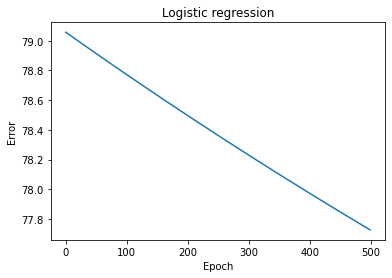

In [17]:
########################################################################
# Code to convert the tweet classes into binary 0/1 labels
########################################################################

labels = {label: int(idx) for idx, label in enumerate(y.unique())}
Y_train_bin = np.array([labels[label] for label in y_train.values]).reshape((-1,1))  
Y_test_bin = np.array([labels[label] for label in y_test.values]).reshape((-1,1))  

########################################################################
# Code to train logistic regression model to the training data
########################################################################

model = LogisticRegr()
error = model.fit(X_train, Y_train_bin, learning_rate = 0.05, maxiter=500)

print('Model coefficients:', model.w)
print('Model intercept:', model.w0 )


plt.plot(error)
plt.title('Logistic regression')
plt.xlabel('Epoch')
plt.ylabel('Error')


**(b)** Apply the model to both training and test sets. Report the classification performance.

**Note:** The numbers below are for illustrative purposes only. The actual results may vary depending on the data.

In [18]:
print('Model performance on training set:')

Ypred_train = model.predict(X_train)

print(classification_report(Y_train_bin, Ypred_train[0]))

print('\nModel performance on test set:')


Ypred_test = model.predict(X_test)
print(classification_report(Y_test_bin, Ypred_test[0]))

Model performance on training set:
              precision    recall  f1-score   support

           0       0.66      0.83      0.74     12561
           1       0.77      0.56      0.65     12439

    accuracy                           0.70     25000
   macro avg       0.72      0.70      0.69     25000
weighted avg       0.72      0.70      0.69     25000


Model performance on test set:
              precision    recall  f1-score   support

           0       0.64      0.82      0.72     12541
           1       0.75      0.54      0.63     12459

    accuracy                           0.68     25000
   macro avg       0.69      0.68      0.67     25000
weighted avg       0.69      0.68      0.67     25000



In [19]:
from sklearn.metrics import accuracy_score
print('Accuracy of Test Data :', accuracy_score(Y_test_bin, Ypred_test[0]))
print('Accuracy of Train Data :', accuracy_score(Y_train_bin, Ypred_train[0]))

Accuracy of Test Data : 0.67868
Accuracy of Train Data : 0.70012


### 2. Multi-layer Neural network

This step requires you to implement a fully-connected neural network of arbitrary depth to solve the classification problem. For each layer you will implement a `forward` and a `backprop` function  separately. The `forward` function will receive inputs from previous layer, alongside with models parameters and will return an output for next layer and also store the data needed for the backward pass in a cache object. The `backprop` function receives the gradients from its next layer and use them to compute the gradients with respect to the inputs and weights. The last layer of the network is a fully connected layer with a sigmoid activation function. The network should be trained to minimize the cross entropy loss function. For all other hidden layers of the network, the user can specify the number of hidden nodes and type of activation function as hyper-parameters.

**Step 7:** You will need to implement two classes: `Layer` and `MultiLayerNet`. The `Layer` class contains implementation for a single layer in the multi-layer network. The layer must store the following parameters:
- `self.activation_type`: which takes either the value `ReLU` or `sigmoid`
- `self.W`: this corresponds to the weight matrix W associated with the neural network
- `self.b`: this corresponds to the bias parameter of the neural network

The class also contains implementation of the `forward` and `backprop` functions that correspond to computations of the forward pass and backward pass of the neural network layer (see lecture notes for details). 

In [168]:
class Layer(object):
    """
    
    Implementation of a single layer in a multi-layer neural network. 
    
    """
    
    def __init__(self, input_dim, output_dim, activation_type):
        """"        
            Input:  
                input_dim: dimension of its input attributes
                output_dim: dimension of its output
                activation_type: 'ReLU' or 'sigmoid' (default = 'sigmoid')
 
            This function should store the activation_type and creates two variables:
            - self.W: a matrix of size output_dim x input_dim to represent the weight parameter of the neural network
            - self.b: a vector of length output_dim to represent the bias parameter of the neural network
            
            You should initialize self.W randomly from a Gaussian distribution with mean 0 and standard deviation (scale) 
            equals to 0.1
            
        """    

        self.input_size = input_dim
        self.output_size = output_dim
        self.activation_type = activation_type

        self.W = np.random.normal(0, 0.1,(self.input_size, self.output_size))
        self.b = np.random.random((1, self.output_size))

        self.z = None
        self.a = None
        self.grad_W = None
        self.grad_b = None

    def sigmoid(self,z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self,z):
        return self.sigmoid(z) * (1 - self.sigmoid(z))

    def ReLU(self,z):
        return np.maximum(0, z)

    def ReLU_derivative(self,z):
        return np.where(z <= 0, 0, 1)

    def forward(self, x):
        """
            This function computes the forward propagation step of a layer in the neural network. 
            
            Input:  
                x: a vector whose length should be equal to input_dim

            Output:
                a: output activation.   

            The output activation for a given input vector x is computed as follows: sigma[Wx + b], 
            where sigma is the activation function. 

        """
        
        self.z = np.dot(x, self.W) + self.b

        if self.activation_type == 'sigmoid':
            self.a = self.sigmoid(self.z)
        elif self.activation_type == 'ReLU':
            self.a = self.ReLU(self.z)
        else:
            raise NameError('activation type is not defined!')   
    

        return self.a
    
    def backprop(self, x, delta_l, next_layer=None):
        """
        This function performs the backward propagation step of the neural network. Specifically,
        it calculates the gradient of the loss function with respect to the weight and bias parameters
        and stores them as self.grad_W and self.grad_b, respectively.

        Input:
            x: input vector.
            delta_l: loss propagated from its next layer.
            next_layer: next layer object, which is needed to update delta_l.

        Output:
            delta_l_minus_1: gradient to be transmitted to its previous layer

        Note:
        1. If next_layer=None, this implies it is the last layer of the multi-layer neural network.
        2. The formula for computing the gradient delta_l depends on the activation function (RELU or sigmoid).
        3. The update formula for self.W and self.b also depends on the activation function (RELU or sigmoid).

        """
        if self.activation_type == 'sigmoid':
            derivative = self.sigmoid_derivative(self.a)
        elif self.activation_type == 'ReLU':
            derivative = self.ReLU_derivative(self.z)
        else:
            raise NameError('activation type is not defined!')

        gradient = delta_l * derivative

        self.grad_W = np.dot(x.T, gradient)
        self.grad_b = np.sum(gradient, axis=0, keepdims=True)

        if next_layer is not None:
            delta_l_minus_1 = np.dot(gradient, next_layer.W.T) * derivative
        else:
            delta_l_minus_1 = delta_l
            
        return delta_l_minus_1



    def backprop(self, x, delta_l, next_layer = None):
       
        """   This function performs the backward propagation step of the neural network. Specifically,
           it calculates the gradient of the loss function with respect to the weight and bias parameters
           and stores them as self.grad_W and self.grad_b, respectively.
            
            Input:  
                x: input vector.
                delta_l: loss propagated from its next layer.
                next_layer: next layer object, which is needed to update delta_l.

            Output:
                delta_l: gradient to be transmitted to its previous layer
                
            Note:
            1. If next_layer=None, this implies it is the last layer of the multi-layer neural network. 
            2. The formula for computing the gradient delta_l depends on the activation function (RELU or sigmoid).
            3. The update formula for self.W and self.b also depends on the activation function (RELU or sigmoid).
        """
        

        if self.activation_type =='sigmoid':
            gradient = delta_l * self.sigmoid_derivative(self.a)

        elif self.activation_type == 'ReLU':
            gradient = delta_l * self.ReLU_derivative(self.a)
        else:
            raise NameError('activation type is not defined!') 
        
        if self.activation_type == 'sigmoid':
            derivative = self.sigmoid_derivative(self.a)
        elif self.activation_type == 'ReLU':
            derivative = self.ReLU_derivative(self.a)
        else:
            raise NameError('activation type is not defined!')

        self.grad_W = np.dot(x.T, gradient)
        self.grad_b = np.sum(gradient, axis=0, keepdims=True)

        if next_layer is None:
            delta_l_minus_1 = np.dot(gradient, self.W.T)

        elif next_layer is not None:
            delta_l_minus_1 = np.dot(gradient,next_layer.W)
        
    
        return delta_l_minus_1

In [169]:
class MultiLayerNet(object):
    """
   
       Implementation of a multi-layer neural network.
       
    """
    
    def __init__(self, layers, learning_rate = 0.001, epochs = 50):
        """"        
            Input:  
                layers: a list of layers associated with the multi-layer neural network.
                learning_rate: learning rate for gradient descent algorithm.
                epochs: maximum number of epochs to train the neural network.

            This function should store the input variables locally as self.layers, self.learning_rate,
            and self.epochs. These variables are needed when the network performs forward and back propagation. 
            
        """    
        self.learning_rate = learning_rate
        self.epochs =  epochs
        self.layers = layers

    
    def cross_entropy_loss_derivative(self,y_hat, y):
        return (y_hat - y) / ((y_hat * (1 - y_hat))) 

    def forward(self,x):
        """
            This function computes the forward propagation step of the multi-layer neural network. 
            Given an input vector x, it will first apply the forward function from the first layer,
            then passes its output activation as input to the next layer, and so on, until it 
            receives the output activation from the last layer of the network. 
            
            Input:  
                x: an input vector of predictor attribute values.

            Output:
                y_pred: predicted value given by the output activation of the last layer of the network. 

        """

        for layer in self.layers:
            x = layer.forward(x)

        y_pred = x
        return y_pred
    

        
    def backprop(self, x, y):
        """
            This function implements the backward propagation step of the multi-layer neural network. 
            Starting from the last layer, it computes the gradient of the loss function and back-propagates 
            the gradient to its previous layer and repeat the process until the gradient of the first
            layer is computed. 
            
            Input:  
                x: input vector.
                y: ground truth class.
                
        """
        y_hat = self.forward(x)
        delta_l = self.cross_entropy_loss_derivative(y_hat, y)

        for i in range(len(self.layers) - 1, -1, -1):
            if i == len(self.layers) - 1:
                delta_l_minus_1 = self.layers[i].backprop(self.layers[i - 1].a, delta_l)
            elif i == 0:
                delta_l_minus_1 = self.layers[i].backprop(x, delta_l, self.layers[i + 1])
            else:
                delta_l_minus_1 = self.layers[i].backprop(self.layers[i - 1].a, delta_l, self.layers[i + 1])

            delta_l = delta_l_minus_1

        return delta_l
        

   
    def loss(self, y_hat, y):
        """
            This function computes the cross-entropy loss.
            
            Input: 
                y: vector of ground truth classes.
                y_hat: vector of predicted classes. 
        
            Output:
                Cross entropy loss.
        """

        loss = np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)) * (-1/len(y))
        
        return loss 


    def fit(self, X, Y, plot_loss = False):
        """
            This function is invoked when training the neural network model.
        
            Input:
                X: A 2-d numpy array consisting of the predictor attribute values of the training data  
                Y: A numpy array vector consisting of the target class labels of the training data
                plot_loss: A True/False value. It will display the average loss at each epoch average if set to True. 
        """
        loss_history = []
        for epoch in tqdm(range(self.epochs)):
            epoch_loss =0
            for x, y in zip(X, Y):
                
                x = np.array([x])  
                y = np.array([y])  
                y_hat = self.forward(x) 
                self.backprop(x, y)

                for layer in self.layers:
                    layer.W -= self.learning_rate * layer.grad_W
                    layer.b -= self.learning_rate * layer.grad_b

                loss = self.loss(y_hat, y)
                epoch_loss += loss

            epoch_loss /= len(X)
            loss_history.append(epoch_loss)
       
        if plot_loss:
            plt.plot(loss_history)
            plt.xlabel('epoch')
            plt.ylabel('Loss')
            plt.title('loss')                   
        
    def predict(self, X):
        """
            This function is used to predict class label of any input data X. Specifically,
            for each data point, it will call the forward() function to calculate the
            output activation of the last layer of the neural network. It will then predict
            the class label based on the value of the output activation. If the output is
            greater than or equal to 0.5, it will predict the class label to be 1. Otherwise, 
            it will predict the class label to be 0.

            Input:
                X: A 2-dimensional numpy array of predictor attribute values. 

            Output:
                Y_hat: A numpy array that contains the predicted class label of the input data.
                       Each element of the vector is either 0 or 1.
        """
       
        
        Y_hat = self.forward(X)
        return np.round(Y_hat)
        
        

**(a)** Create a 3-layer network and train the neural network to classify the tweets. The architecture of the 3 layer network is as follows:

    - Hidden layer 1: #hidden nodes = 10, activation function = sigmoid
    - Hidden layer 2: #hidden nodes = 5, activation function = ReLU
    - Output layer: #output nodes = 1, activation function = sigmoid
    
Set the learning rate to 0.001 and maximum epoch to be 100. You can also try other configuration and look for the best possible classification result. 

100%|██████████| 100/100 [21:39<00:00, 12.99s/it]


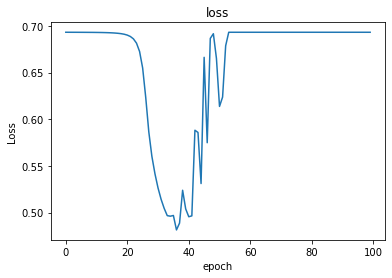

In [170]:
########################################################################
# Code to convert the classes into binary 0/1 labels
########################################################################

labels = {label: int(idx) for idx, label in enumerate(y.unique())}
Y_train_bin = np.array([labels[label] for label in y_train.values]).reshape((-1,1))  
Y_test_bin = np.array([labels[label] for label in y_test.values]).reshape((-1,1))  

########################################################################
# Code to train the multi-layer network on the twitter data
########################################################################

layers = [Layer(X_train.shape[1],10,'sigmoid'),Layer(10,5,'ReLU'),Layer(5,1,'sigmoid') ]
model = MultiLayerNet(layers, learning_rate= 0.001, epochs =100)
model.fit(X_train, Y_train_bin, plot_loss = True )

**(b)** Apply the model to the training and test data and report their performance.

**Note:** The numbers below are for illustrative purposes only. The actual results may vary depending on the data.

In [171]:
print('Model performance on training set:')
Ypred = model.predict(X_train)


print(classification_report(Y_train_bin, Ypred))

print('\nModel performance on test set:')
Ypred = model.predict(X_test)


print(classification_report(Y_test_bin, Ypred))

Model performance on training set:


/Users/yashashvini/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yashashvini/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yashashvini/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.50      1.00      0.67     12561
           1       0.00      0.00      0.00     12439

    accuracy                           0.50     25000
   macro avg       0.25      0.50      0.33     25000
weighted avg       0.25      0.50      0.34     25000


Model performance on test set:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67     12541
           1       0.00      0.00      0.00     12459

    accuracy                           0.50     25000
   macro avg       0.25      0.50      0.33     25000
weighted avg       0.25      0.50      0.34     25000



/Users/yashashvini/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yashashvini/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yashashvini/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
